# Apriori

* All subsets of a frequent itemset must be frequent(Apriori property).
If an itemset is infrequent, all its supersets will be infrequent.

* Original application in market basket analysis, the Apriori algorithm has found use in diverse fields like recommendation systems, bioinformatics, and network analysis. Its adaptability and simplicity have inspired various enhancements, addressing scalability and extending its capabilities to capture more complex relationships.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install apyori

## Importing dataset

In [3]:
df=pd.read_csv('/content/BigBasket.csv', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,knor,ginger garlic paste,MTR Idli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,spirit fish,tomatoes,spaghetti,mineral water,patanjali tea,salmon,eggs,chicken,cadbury white chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kinley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#preprocess data into a list of transactions
transactions = []

for i in range(0, 7219):
  transactions.append([str(df.values[i,j]) for j in range(0, 20)])

In [6]:
print(transactions)

[['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['knor', 'ginger garlic paste', 'MTR Idli', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'spirit fish', 'tomatoes', 'spaghetti', 'mineral water', 'patanjali tea', 'salmon', 'eggs', 'chicken', 'cadbury white chocolate', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['kinley', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'eggs', 'chicken', 'chocolate', 'french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['vegetable baske

## Apriori Training on Dataset

In [7]:
from apyori import apriori
rules = apriori(
    transactions=transactions,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,
    min_length=2,
    max_length=2
)

## Visualizing

### Raw Results

In [8]:
res=list(rules)

In [9]:
res

[RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005402410306136584, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.26530612244897955, lift=3.0594966421073218)]),
 RelationRecord(items=frozenset({'paneer', 'buns'}), support=0.016068707577226764, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buns'}), items_add=frozenset({'paneer'}), confidence=0.32402234636871513, lift=3.2852771326344867)]),
 RelationRecord(items=frozenset({'ginger garlic paste', 'chicken'}), support=0.004571270259038648, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ginger garlic paste'}), items_add=frozenset({'chicken'}), confidence=0.29203539823008845, lift=4.791371681415929)]),
 RelationRecord(items=frozenset({'fruit basket', 'vegetable basket'}), support=0.0055409336473195734, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit basket'}), items_add=frozenset({'vegetable basket'}), conf

In [10]:
print(res)

[RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005402410306136584, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.26530612244897955, lift=3.0594966421073218)]), RelationRecord(items=frozenset({'paneer', 'buns'}), support=0.016068707577226764, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buns'}), items_add=frozenset({'paneer'}), confidence=0.32402234636871513, lift=3.2852771326344867)]), RelationRecord(items=frozenset({'ginger garlic paste', 'chicken'}), support=0.004571270259038648, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ginger garlic paste'}), items_add=frozenset({'chicken'}), confidence=0.29203539823008845, lift=4.791371681415929)]), RelationRecord(items=frozenset({'fruit basket', 'vegetable basket'}), support=0.0055409336473195734, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit basket'}), items_add=frozenset({'vegetable basket'}), confide

### Proper Display

In [11]:
def inspect(results):
    product1         = [tuple(result[2][0][0])[0] for result in results]
    product2         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(product1, product2, supports, confidences, lifts))
DataFrame_intelligence = pd.DataFrame(inspect(res), columns = ['product1', 'product2', 'Support', 'Confidence', 'Lift'])

In [12]:
DataFrame_intelligence

,product1,product2,Support,Confidence,Lift
0,almonds,burgers,0.005402,0.265306,3.059497
1,buns,paneer,0.016069,0.324022,3.285277
2,ginger garlic paste,chicken,0.004571,0.292035,4.791372
3,fruit basket,vegetable basket,0.005541,0.294118,3.081619
4,ginger garlic paste,olive oil,0.003325,0.212389,3.234681
5,kissan puree,paneer,0.005402,0.378641,3.839056
6,pasta,maggi,0.003463,0.247525,3.456250
7,pasta,mushroom,0.005402,0.386139,4.873312
8,pepper spray,mushroom,0.005818,0.302158,3.813428
9,neckrest,trolly bag,0.003463,0.271739,5.620873


In [13]:
top_associations = DataFrame_intelligence.nlargest(n=10, columns='Lift')
print("Top Associations:")
print(top_associations)


Top Associations:
               product1          product2   Support  Confidence      Lift
9              neckrest        trolly bag  0.003463    0.271739  5.620873
7                 pasta          mushroom  0.005402    0.386139  4.873312
2   ginger garlic paste           chicken  0.004571    0.292035  4.791372
10    whole wheat pasta         olive oil  0.007757    0.266667  4.061322
5          kissan puree            paneer  0.005402    0.378641  3.839056
8          pepper spray          mushroom  0.005818    0.302158  3.813428
6                 pasta             maggi  0.003463    0.247525  3.456250
1                  buns            paneer  0.016069    0.324022  3.285277
4   ginger garlic paste         olive oil  0.003325    0.212389  3.234681
3          fruit basket  vegetable basket  0.005541    0.294118  3.081619


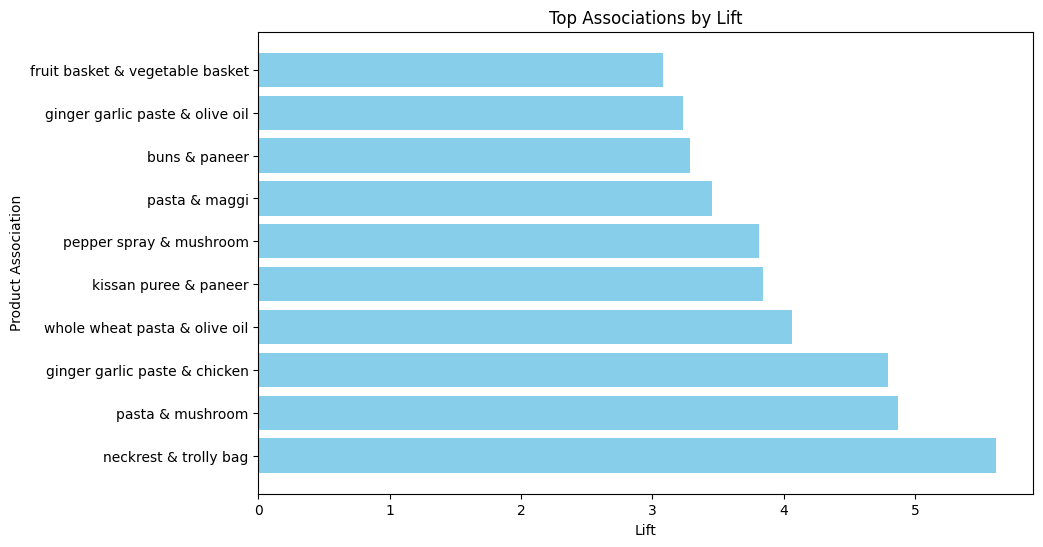

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(top_associations['product1'] + ' & ' + top_associations['product2'], top_associations['Lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Product Association')
plt.title('Top Associations by Lift')
plt.show()

**Report:**

In this Colab, we apply the Apriori algorithm, a classical technique for mining associations in transactional data, to uncover meaningful relationships within a dataset of shopping cart items. Here's a breakdown of what each section of the code accomplishes:

---

**Data Loading and Preprocessing:**
we have a .csv file with transactional data done in Big Basket Application.
The data is then preprocessed to create a list of transactions, where each transaction is a list of items purchased.

**Apriori Algorithm Application:**
We use the apyori library to apply the Apriori algorithm on the transaction data.
The algorithm is configured with various parameters like min_support, min_confidence, and min_lift to filter the associations.
Associations with a specific item count (min_length and max_length) are considered.

**Results Extraction and Organization:**
The raw results from the Apriori algorithm are stored in the results list.
We define the inspect function to extract and organize relevant information from the results, including product pairs, support, confidence, and lift.
DataFrame Creation and Formatting:

We create a DataFrame named DataFrame_intelligence using the inspect function to format the results for easier analysis.

**Top Associations and Visualization:**
The top associations are extracted from the DataFrame based on the highest lift values using the nlargest function.
The code can be further expanded to visualize the associations using appropriate charts or graphs.